### Tests

In [ ]:
#Charger les données selon le format
pd.read_excel()
pd.read_csv()
#pd.read_...()

In [ ]:
df.head() #Affiche le début du Dataframe
df.describe() #Statistiques rapides
df.drop(['column', 'column', ...]) #Supprime certaines colonnes
df.dropna(axis=0) #Suppr les lignes aux données manquantes
df.['column'].value_counts() #Compter les répétitions
df.groupby(['column']) #Analyse par groupe

In [ ]:
data.set_index(['column']) #change l'axe des index à la column donnée en argument

In [ ]:
data['column'] = Série # Ndarray
data['column'][0:10] # Indexing
data['column'] < 18 # Mask
data[data['column']<18] # Boolean indexing
data[['column1', 'column2']] = Dataframe
data.iloc[0:2, 0:2] #Localisation par index
data.loc[0:2, 'column']

### Mise en pratique

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import datetime

In [232]:
df_movies = pd.read_csv('movies.csv', index_col="movieId")
df_ratings = pd.read_csv('ratings.csv')


In [237]:
movie1 = df_ratings.loc[df_ratings['movieId'] == 1]


In [239]:
df2 = pd.concat([df_movies,df_ratings], axis=1)

In [243]:
movie1 = df2.loc[df2['movieId'] == 1]
movie1

,title,genres,userId,movieId,rating,timestamp
0,NaN,NaN,1.0,1.0,4.0,9.649827e+08
516,Renaissance Man (1994),Comedy|Drama,5.0,1.0,4.0,8.474350e+08
874,NaN,NaN,7.0,1.0,4.5,1.106636e+09
1434,NaN,NaN,15.0,1.0,2.5,1.510578e+09
1667,Mad City (1997),Action|Drama,17.0,1.0,4.5,1.305696e+09
...,...,...,...,...,...,...
97364,NaN,NaN,606.0,1.0,2.5,1.349083e+09
98479,NaN,NaN,607.0,1.0,4.0,9.647440e+08
98666,NaN,NaN,608.0,1.0,2.5,1.117408e+09
99497,NaN,NaN,609.0,1.0,3.0,8.472210e+08


In [ ]:
#df_movies.shape #Nb (lignes, colonnes)
df_ratings.shape

In [ ]:
df_ratings.columns

In [ ]:
df_ratings.head()

In [ ]:
#data = data.drop([column1,column3,...], axis=1)

In [ ]:
data.describe()

In [ ]:
# Données manquantes
#Option 1 : compléter par une valeur défaut (moyenne ici), corromp le dataset !
data.fillna(data['column'].mean())

In [ ]:
# Option 2 : éliminer des lignes
df = data.dropna(axis=0)

In [ ]:
df_ratings['userId'].value_counts()
# TODO: Trouver comment afficher seulement les titres en doublons

In [ ]:
df_ratings['movieId'].value_counts().plot.bar() # Pandas utilise Matplotlib.pyplot

In [ ]:
#Fonctions liés à Matplotlib
data.plot()
data.plot.bar()
data.hist()
data.plot.scatter()
pd.plotting.scatter_matrix(data)

In [ ]:
df_ratings['movieId'].hist()

In [ ]:
data = df_ratings.drop(['userId','timestamp'], axis=1)
df_ratings.groupby(['userId']).mean() #Analyser par groupe

In [ ]:
df_ratings.groupby(['userId','movieId']).mean()

In [ ]:
# Trie

### Afficher une timeserie des notes pour un film

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import datetime

df = pd.read_csv('ratings.csv', parse_dates=True)
#pd.to_datetime(df_ratings['timestamp']).dt.date
#df_ratings.timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())
df.loc[:, 'timestamp'] = df.timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())

#df_ratings.timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())

<ipython-input-59-799b45ef12e5>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df.loc[:, 'timestamp'] = df.timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())


In [60]:
df = df.set_index('timestamp')

In [56]:
#df.index=pd.DatetimeIndex(df.index)
df.index.astype('datetime64[ns]')

In [62]:
df.index = pd.to_datetime(df.index)

In [64]:
df.index

DatetimeIndex(['2000-07-30', '2000-07-30', '2000-07-30', '2000-07-30',
               '2000-07-30', '2000-07-30', '2000-07-30', '2000-07-30',
               '2000-07-30', '2000-07-30',
               ...
               '2017-05-04', '2017-05-03', '2017-05-04', '2017-05-03',
               '2017-05-04', '2017-05-03', '2017-05-04', '2017-05-08',
               '2017-05-03', '2017-05-03'],
              dtype='datetime64[ns]', name='timestamp', length=100836, freq=None)

<Figure size 864x576 with 0 Axes>

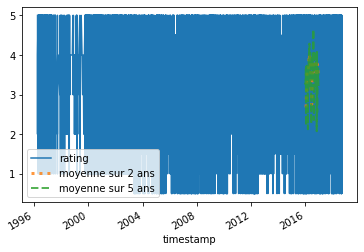

In [111]:
#df.groupby(['timestamp']).count()['rating'].plot()
plt.figure(figsize=(12, 8))
df.plot(y='rating')
df.loc['2016','rating'].resample('M').mean().plot(y='rating',label='moyenne sur 2 ans', lw=3, ls=':', alpha=0.8)
df.loc['2016','rating'].resample('W').mean().plot(y='rating',label='moyenne sur 5 ans', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [66]:
df.movieId[0]

1

In [67]:
df.iloc[0:5,0:2]

,userId,movieId
timestamp,,
2000-07-30,1,1
2000-07-30,1,3
2000-07-30,1,6
2000-07-30,1,47
2000-07-30,1,50


In [148]:
movie1 = df.loc[df['movieId'] == 1]
movie1.sort_values(by='timestamp')
movie2 = df.loc[df['movieId'] == 3114]
movie3 = df.loc[df['movieId'] == 78499]


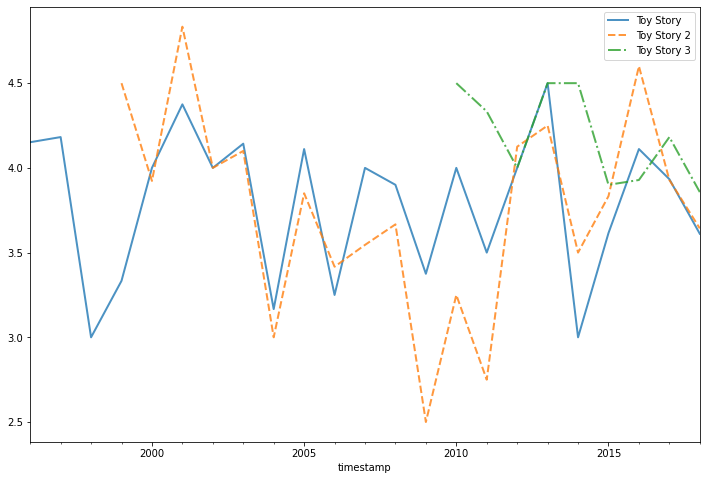

In [192]:
plt.figure(figsize=(12, 8))
movie1.loc['1995':'2019', 'rating'].resample('Y').mean().plot(y='rating',label='Toy Story', lw=2, ls='-', alpha=0.8)
movie2.loc['1995':'2019', 'rating'].resample('Y').mean().plot(y='rating',label='Toy Story 2', lw=2, ls='--', alpha=0.8)
movie3.loc['1995':'2019', 'rating'].resample('Y').mean().plot(y='rating',label='Toy Story 3', lw=2, ls='-.', alpha=0.8)

plt.legend()
plt.show()

In [198]:
a =df.groupby(['movieId'])
a

<AxesSubplot:xlabel='movieId'>

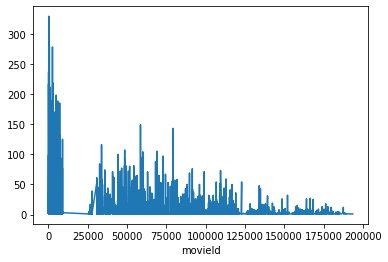

In [221]:
df.groupby('movieId').count()['rating'].plot()

In [30]:
#Set up DatetimeIndex (easier to just load in data with index as OrDate)
df = df.set_index('timestamp', drop=True)
df.index = pd.DatetimeIndex(df.index)
df.index.name = 'timestamp'

#Save original timestamps for later
idx = df.index

#Make timeseries with regular daily interval
df = df.resample('d').first()

#Take the moving mean with window size of 45 days
df = df.rolling(window=45, min_periods=0).mean()

#Grab the values for the original timestamp and put the index back
df = df.idx[idx].reset_index()

KeyError: "None of ['timestamp'] are in the columns"